In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

In [33]:
# set a default figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [13]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,bedrooms,bathrooms,balconies,floor_num,age_possession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,2.50,13602.0,3.0,3.0,3,19.0,Relatively New,1654.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
1,flat,bestech park view city,sector 48,2.65,10323.0,4.0,4.0,3+,11.0,Moderately Old,2134.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0
2,flat,ss the leaf,sector 85,1.20,7317.0,2.0,2.0,3,6.0,Relatively New,1300.0,0.0,0.0,0.0,0.0,0.0,1.0,174.0
3,flat,signature global solera,sector 107,0.52,8062.0,3.0,2.0,2,5.0,Relatively New,717.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0
4,flat,signature global park,sohna road,0.54,7248.0,2.0,1.0,3,1.0,New Property,828.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0


In [14]:
df.drop(columns=['society', 'price_per_sqft'], inplace=True)
df.head()

,property_type,sector,price,bedrooms,bathrooms,balconies,floor_num,age_possession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 65,2.50,3.0,3.0,3,19.0,Relatively New,1654.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0
1,flat,sector 48,2.65,4.0,4.0,3+,11.0,Moderately Old,2134.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0
2,flat,sector 85,1.20,2.0,2.0,3,6.0,Relatively New,1300.0,0.0,0.0,0.0,0.0,0.0,1.0,174.0
3,flat,sector 107,0.52,3.0,2.0,2,5.0,Relatively New,717.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0
4,flat,sohna road,0.54,2.0,1.0,3,1.0,New Property,828.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0


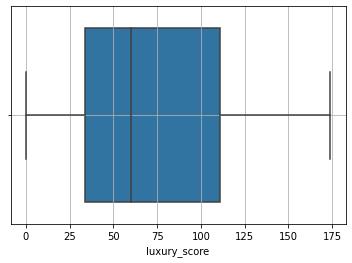

In [15]:
sns.boxplot(x=df['luxury_score'])
plt.grid()

In [16]:
def cat_luxury(score):
    if 0 <= score < 50:
        return 'budget'
    elif 50 <= score < 150:
        return 'medium'
    elif 150 <= score <= 175:
        return 'high'
    else:
        return None

In [18]:
df['luxury_category'] = df['luxury_score'].apply(cat_luxury)
df.head()

,property_type,sector,price,bedrooms,bathrooms,balconies,floor_num,age_possession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 65,2.50,3.0,3.0,3,19.0,Relatively New,1654.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,budget
1,flat,sector 48,2.65,4.0,4.0,3+,11.0,Moderately Old,2134.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0,high
2,flat,sector 85,1.20,2.0,2.0,3,6.0,Relatively New,1300.0,0.0,0.0,0.0,0.0,0.0,1.0,174.0,high
3,flat,sector 107,0.52,3.0,2.0,2,5.0,Relatively New,717.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,budget
4,flat,sohna road,0.54,2.0,1.0,3,1.0,New Property,828.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,medium


In [34]:
sns.boxplot(x=df['floor_num'])
plt.grid()

KeyError: 'floor_num'

In [20]:
def floor_cat(floor_num):
    if 0 <= floor_num <= 2:
        return 'low floor'
    elif 3 <= floor_num <= 10:
        return 'medium floor'
    elif 11 <= floor_num <= 51:
        return 'high floor'
    else:
        return None

In [22]:
df['floor_category'] = df['floor_num'].apply(floor_cat)
df.head()

,property_type,sector,price,bedrooms,bathrooms,balconies,floor_num,age_possession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 65,2.50,3.0,3.0,3,19.0,Relatively New,1654.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,budget,high floor
1,flat,sector 48,2.65,4.0,4.0,3+,11.0,Moderately Old,2134.0,1.0,1.0,0.0,0.0,0.0,1.0,174.0,high,high floor
2,flat,sector 85,1.20,2.0,2.0,3,6.0,Relatively New,1300.0,0.0,0.0,0.0,0.0,0.0,1.0,174.0,high,medium floor
3,flat,sector 107,0.52,3.0,2.0,2,5.0,Relatively New,717.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,budget,medium floor
4,flat,sohna road,0.54,2.0,1.0,3,1.0,New Property,828.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,medium,low floor


In [23]:
df.drop(columns=['floor_num', 'luxury_score'], inplace=True)
df.head()

,property_type,sector,price,bedrooms,bathrooms,balconies,age_possession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 65,2.50,3.0,3.0,3,Relatively New,1654.0,0.0,0.0,0.0,0.0,0.0,0.0,budget,high floor
1,flat,sector 48,2.65,4.0,4.0,3+,Moderately Old,2134.0,1.0,1.0,0.0,0.0,0.0,1.0,high,high floor
2,flat,sector 85,1.20,2.0,2.0,3,Relatively New,1300.0,0.0,0.0,0.0,0.0,0.0,1.0,high,medium floor
3,flat,sector 107,0.52,3.0,2.0,2,Relatively New,717.0,0.0,0.0,0.0,0.0,1.0,0.0,budget,medium floor
4,flat,sohna road,0.54,2.0,1.0,3,New Property,828.0,0.0,0.0,0.0,0.0,0.0,0.0,medium,low floor


- Linear/Log regression models: one-hot encoding
- Tree based models: ordinal encoding

In [28]:
from sklearn.preprocessing import OrdinalEncoder

data_label_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])

X_label = data_label_encoded.drop(columns=['price'])
y_label = data_label_encoded['price']

In [29]:
X_label.head()

,property_type,sector,bedrooms,bathrooms,balconies,age_possession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,73.0,3.0,3.0,3.0,3.0,1654.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,54.0,4.0,4.0,4.0,0.0,2134.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,97.0,2.0,2.0,3.0,3.0,1300.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
3,0.0,9.0,3.0,2.0,2.0,3.0,717.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,0.0,111.0,2.0,1.0,3.0,1.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [30]:
y_label.head()

0    2.50
1    2.65
2    1.20
3    0.52
4    0.54
Name: price, dtype: float64

### 1. Correlation Analysis

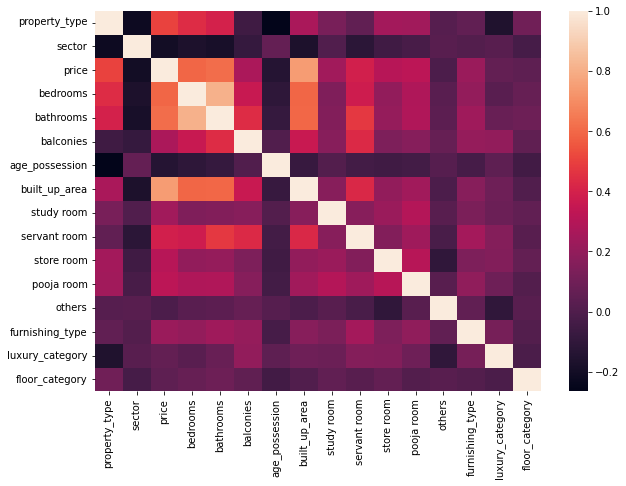

In [35]:
sns.heatmap(data_label_encoded.corr())
plt.show()

In [80]:
fi_df1 = data_label_encoded.corr()['price'].to_frame().reset_index().rename(columns={'index': 'feature', 'price': 'corr_coeff'}).sort_values('corr_coeff', ascending=False).iloc[1:]
fi_df1

,feature,corr_coeff
7,built_up_area,0.744296
4,bathrooms,0.609836
3,bedrooms,0.591352
0,property_type,0.503774
9,servant room,0.392015
11,pooja room,0.319908
10,store room,0.305712
5,balconies,0.269848
8,study room,0.243021
13,furnishing_type,0.223608


### 2. Random Forest Feature Importance

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

fi_df2 = pd.DataFrame({
            'feature': X_label.columns,
            'rf_importance': rf_label.feature_importances_}).sort_values(by='rf_importance', ascending=False).reset_index().drop(columns='index')
fi_df2

,feature,rf_importance
0,built_up_area,0.642951
1,property_type,0.105239
2,sector,0.103354
3,bathrooms,0.027160
4,bedrooms,0.025944
5,servant room,0.020399
6,age_possession,0.013647
7,balconies,0.012249
8,furnishing_type,0.009762
9,study room,0.009630


### 3. Gradient Boosting Feature Importance

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

fi_df3 = pd.DataFrame({
            'feature': X_label.columns,
            'gb_importance': gb_label.feature_importances_}).sort_values(by='gb_importance', ascending=False).reset_index().drop(columns='index')
fi_df3

,feature,gb_importance
0,built_up_area,0.676272
1,sector,0.105737
2,property_type,0.101457
3,bedrooms,0.035010
4,bathrooms,0.034254
5,servant room,0.023904
6,store room,0.010443
7,age_possession,0.004711
8,furnishing_type,0.003283
9,balconies,0.001581


### 4. Permutation Importance

In [70]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

fi_df4 = pd.DataFrame({
            'feature': X_label.columns,
            'perm_importance': perm_importance.importances_mean}).sort_values(by='perm_importance', ascending=False).reset_index().drop(columns='index')
fi_df4

,feature,perm_importance
0,built_up_area,0.726894
1,property_type,0.225391
2,sector,0.128043
3,servant room,0.039922
4,bedrooms,0.020795
5,bathrooms,0.008457
6,study room,0.005173
7,store room,0.005167
8,pooja room,0.005106
9,age_possession,0.004893


### 5. Lasso Regression

In [71]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

fi_df5 = pd.DataFrame({
            'feature': X_label.columns,
            'lasso_coeff': lasso.coef_}).sort_values(by='lasso_coeff', ascending=False).reset_index().drop(columns='index')
fi_df5

,feature,lasso_coeff
0,built_up_area,1.513356
1,property_type,0.763733
2,bathrooms,0.269316
3,store room,0.187004
4,study room,0.168278
5,servant room,0.152953
6,furnishing_type,0.152683
7,pooja room,0.076710
8,luxury_category,0.031890
9,bedrooms,0.020344


### 6. Recursive Feature Elimination (RFE)
one of the best feature selection techniques

In [72]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()

selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False).reset_index().drop(columns='index')

fi_df6

,feature,rfe_score
0,built_up_area,0.645525
1,property_type,0.108394
2,sector,0.102511
3,bathrooms,0.030850
4,bedrooms,0.022688
5,servant room,0.017752
6,age_possession,0.013049
7,balconies,0.011355
8,furnishing_type,0.009982
9,study room,0.008090


### 7. Linear Regression Weights

In [76]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False).reset_index().drop(columns='index')

fi_df7

,feature,reg_coeffs
0,built_up_area,1.515817
1,property_type,0.762728
2,bathrooms,0.276366
3,store room,0.190709
4,study room,0.176691
5,servant room,0.160278
6,furnishing_type,0.160103
7,pooja room,0.079339
8,luxury_category,0.041761
9,bedrooms,0.023452


In [81]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')
final_fi_df

,corr_coeff,rf_importance,gb_importance,perm_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
built_up_area,0.744296,0.642951,0.676272,0.726894,1.513356,0.645525,1.515817
bathrooms,0.609836,0.027160,0.034254,0.008457,0.269316,0.030850,0.276366
bedrooms,0.591352,0.025944,0.035010,0.020795,0.020344,0.022688,0.023452
property_type,0.503774,0.105239,0.101457,0.225391,0.763733,0.108394,0.762728
servant room,0.392015,0.020399,0.023904,0.039922,0.152953,0.017752,0.160278
pooja room,0.319908,0.005571,0.000124,0.005106,0.076710,0.004554,0.079339
store room,0.305712,0.007334,0.010443,0.005167,0.187004,0.007573,0.190709
balconies,0.269848,0.012249,0.001581,0.004306,-0.037768,0.011355,-0.061553
study room,0.243021,0.009630,0.001474,0.005173,0.168278,0.008090,0.176691


In [82]:
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)
final_fi_df

,corr_coeff,rf_importance,gb_importance,perm_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
built_up_area,0.188376,0.642951,0.676272,0.618483,0.469919,0.645525,0.471868
bathrooms,0.154345,0.027160,0.034254,0.007195,0.083627,0.030850,0.086032
bedrooms,0.149667,0.025944,0.035010,0.017694,0.006317,0.022688,0.007300
property_type,0.127501,0.105239,0.101457,0.191775,0.237150,0.108394,0.237434
servant room,0.099216,0.020399,0.023904,0.033968,0.047494,0.017752,0.049894
pooja room,0.080966,0.005571,0.000124,0.004345,0.023819,0.004554,0.024698
store room,0.077373,0.007334,0.010443,0.004396,0.058068,0.007573,0.059367
balconies,0.068297,0.012249,0.001581,0.003663,-0.011727,0.011355,-0.019161
study room,0.061507,0.009630,0.001474,0.004402,0.052253,0.008090,0.055003


In [83]:
final_fi_df[['rf_importance','gb_importance','perm_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.645808
property_type      0.126716
sector             0.105137
bedrooms           0.025334
bathrooms          0.024865
servant room       0.024006
age_possession     0.008892
store room         0.007436
balconies          0.007212
study room         0.005899
luxury_category    0.004981
furnishing_type    0.004921
floor_category     0.003722
pooja room         0.003649
others             0.001423
dtype: float64